# Experimentation and Evaluation - Assignment 2
## Experiment: camelCase vs kebab-case

Import the required libraries.

In [76]:
import json

import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

# import matplotlib.pyplot as plt

Load the results from the csv file containing the experiment data.
Structure the data frame to be cleanly and correctly plotted.

In [77]:
# get raw data from json
json_data: dict
with open("data.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)

# cluster questions
NUM_QUESTIONS = 33
NUM_WARMUP = 3
cluster_questions: dict[str, dict] = {}
for i in range(NUM_QUESTIONS):
    cluster_questions[f"question_{i+1}"] = {
        "samples": [],
        "df": None,
        "df_zscore": None,
        "is_kebab": None,
    }

for user_sample in json_data:
    for i, q in enumerate(user_sample["questions"]):
        cluster_questions[f"question_{i+1}"]["samples"].append(q)

for i, (k, v) in enumerate(cluster_questions.items()):
    df_q = pd.DataFrame(v["samples"])
    v["df"] = df_q
    is_kebab = "-" in df_q.correct_word[0]
    v["is_kebab"] = is_kebab
    numeric_cols = df_q.select_dtypes(include=[np.number]).columns
    df_zscore_q = df_q[numeric_cols].apply(st.zscore)
    v["df_zscore"] = df_zscore_q

Plot the raw results

True
False


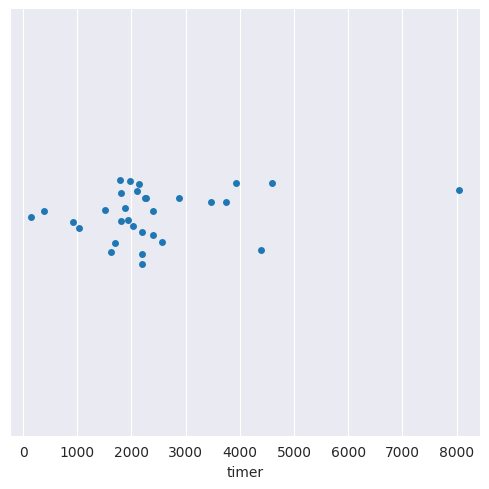

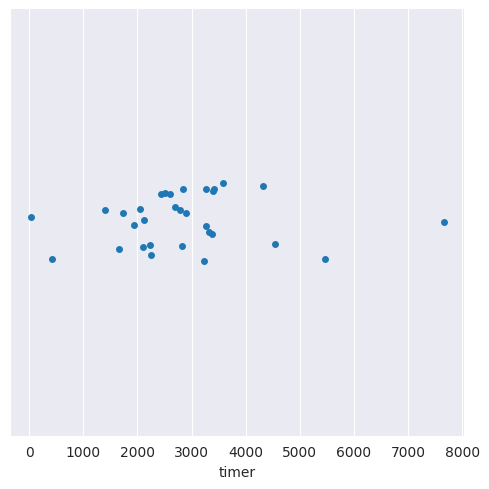

In [38]:
q32 = cluster_questions["question_32"]
print(q32["is_kebab"])
sns.catplot(data=q32["df"], x="timer", jitter=True)

q31 = cluster_questions["question_31"]
print(q31["is_kebab"])
# sns.catplot(data=cluster_questions['question_31']['df'],
# x='timer',  kind='violin', color='.9', inner=None)
# sns.swarmplot(data=cluster_questions['question_31']['df'], x='timer')
sns.catplot(data=q31["df"], x="timer", jitter=True)

Compute z-score: with libraries that encapsulate the translation into a normal distribution and then into a standard distribution to get results with a mean of 0 and a standard deviation of 1.

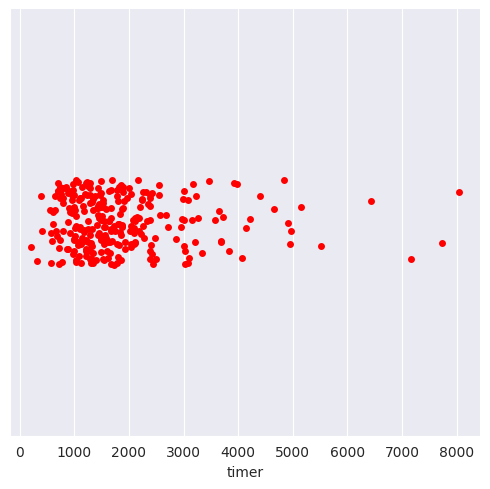

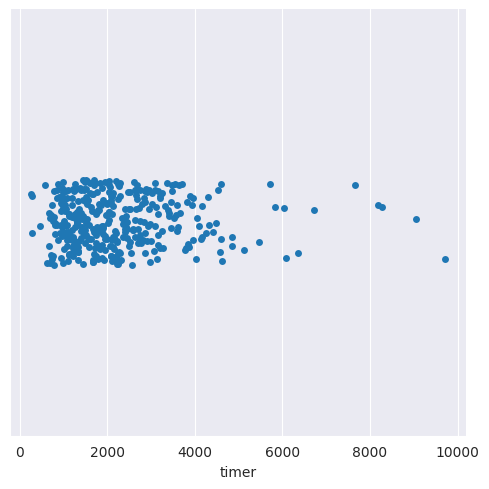

In [92]:
# question [24, 33] many words
KEBAB_SHORT = [4, 8, 10, 11, 12]
CAMEL_SHORT = [5, 6, 7, 9, 13]
KEBAB_MEDIUM = [18, 20, 21, 22]
CAMEL_MEDIUM = [14, 15, 16, 17, 19, 23]
KEBAB_LONG = [29, 30, 32, 33]
CAMEL_LONG = [24, 25, 26, 27, 28, 31]

many_words_kebab = pd.DataFrame()
for i in KEBAB_SHORT + KEBAB_MEDIUM + KEBAB_LONG:
    # for i in [29, 30, 32, 33]:
    if many_words_kebab is None:
        many_words_kebab = cluster_questions[f"question_{i}"]["df"]
    else:
        many_words_kebab = pd.concat(
            [many_words_kebab, cluster_questions[f"question_{i}"]["df"]]
        )

# filter wrong values
many_words_kebab = many_words_kebab[many_words_kebab["timer"] > 200]
many_words_kebab = many_words_kebab[
    many_words_kebab["wrongs"].apply(lambda x: len(x) == 0)
]
many_words_camel = pd.DataFrame()
for i in CAMEL_SHORT + CAMEL_MEDIUM + CAMEL_LONG:
    # for i in [24, 25, 26, 27, 28, 31]:
    if many_words_camel is None:
        many_words_camel = cluster_questions[f"question_{i}"]["df"]
    else:
        many_words_camel = pd.concat(
            [many_words_camel, cluster_questions[f"question_{i}"]["df"]]
        )

many_words_camel = many_words_camel[many_words_camel["timer"] > 200]
many_words_camel = many_words_camel[
    many_words_camel["wrongs"].apply(lambda x: len(x) == 0)
]

times_q32 = many_words_kebab["timer"]
times_q31 = many_words_camel["timer"]
res_stat = st.ttest_ind(times_q32, times_q31)
# print(res_stat)
sns.catplot(data=many_words_kebab, x="timer", jitter=True, color="red")
sns.catplot(data=many_words_camel, x="timer", jitter=True)
# cr_mean = np.nanmean(df.CreditScore.values.tolist())
# cr_std = np.nanstd(df.CreditScore.values.tolist())
# print("Mean Credit Score is: ", cr_mean)
# print("Std Credit Score is: ", cr_std)

z-value plot

Confirm hypothesis

![t-distribtion formula](figures/t-distribution.png)